In [12]:
# Importation des bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime

# Thème esthétique pour les graphiques seaborn
sns.set_theme(style='whitegrid')

In [13]:
# Vérification de l'existence des fichiers avant chargement
import os
files_to_check = [
    '../data/clean/events/donation_goals.csv',
    '../data/clean/events/event_schedule.csv',
    '../data/clean/streamers/streamers_data.csv',
    '../data/clean/streamers/streamers_detailed_stats.csv',
    '../data/clean/temporal/donations_evolution.csv',
    '../data/clean/temporal/viewers_evolution.csv'
 ]

for file in files_to_check:
    if not os.path.exists(file):
        print(f"Fichier manquant : {file}")

# Chargement des données nettoyées
donation_goals = pd.read_csv('../data/clean/events/donation_goals.csv')
event_schedule = pd.read_csv('../data/clean/events/event_schedule.csv')
streamers_data = pd.read_csv('../data/clean/streamers/streamers_data.csv')
streamers_detailed_stats = pd.read_csv('../data/clean/streamers/streamers_detailed_stats.csv')
donations_evolution = pd.read_csv('../data/clean/temporal/donations_evolution.csv')
viewers_evolution = pd.read_csv('../data/clean/temporal/viewers_evolution.csv')

# Conversion des colonnes datetime
donations_evolution['datetime'] = pd.to_datetime(donations_evolution['datetime'], errors='coerce')
viewers_evolution['datetime'] = pd.to_datetime(viewers_evolution['datetime'], errors='coerce')

## Chargement et préparation des données
Ce bloc charge les données nettoyées et prépare les colonnes datetime pour les visualisations.

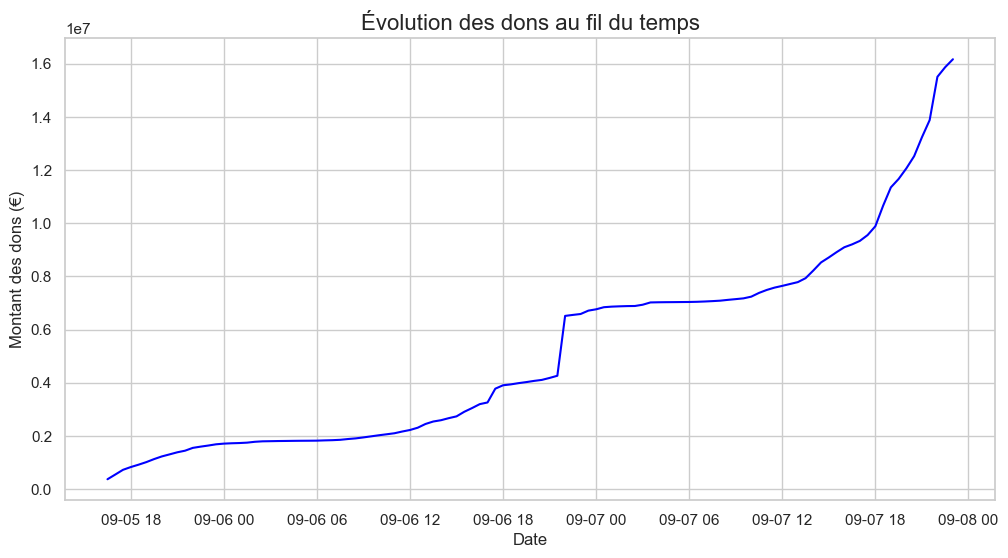

In [14]:
# Visualisation 1 : Évolution des dons au fil du temps
plt.figure(figsize=(12, 6))
sns.lineplot(data=donations_evolution, x='datetime', y='donations', color='blue')
plt.title("Évolution des dons au fil du temps", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Montant des dons (€)", fontsize=12)
plt.grid(True)
plt.show()

## Visualisation 1 : Dons au fil du temps
Analyse de l’évolution cumulée des dons tout au long de l'événement.

In [16]:
# Visualisation 2 : Comparaison des performances des streamers
top_streamers = streamers_detailed_stats.nlargest(10, 'total_donations')
fig = px.bar(top_streamers, x='name', y='total_donations',
             title='Top 10 des streamers par montant total des dons',
             labels={'name': 'Streamer', 'total_donations': 'Dons totaux (€)'},
             color='total_donations',
             color_continuous_scale='Viridis')
fig.show()

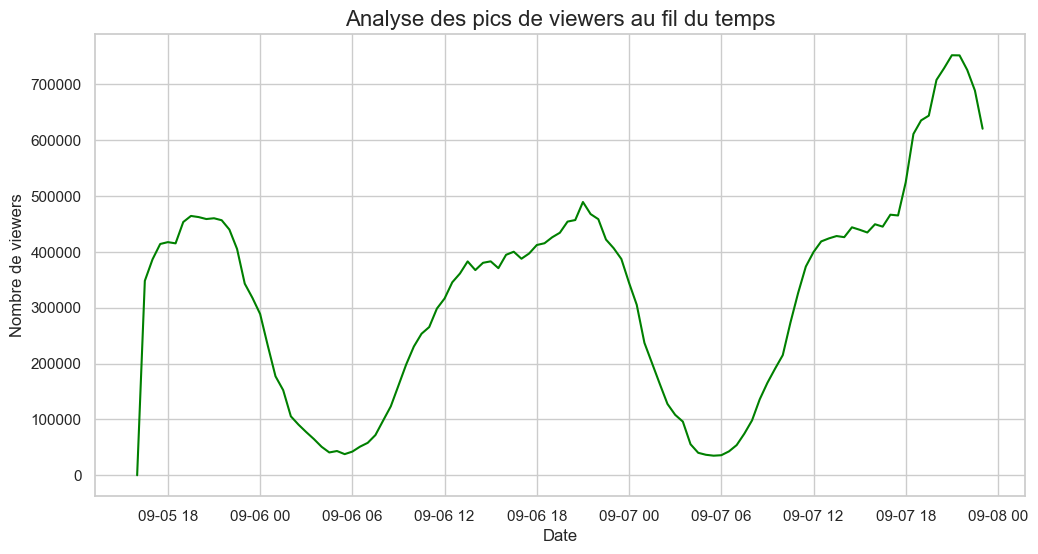

In [17]:
# Visualisation 3 : Analyse des pics de viewers
plt.figure(figsize=(12, 6))
sns.lineplot(data=viewers_evolution, x='datetime', y='viewers', color='green')
plt.title("Analyse des pics de viewers au fil du temps", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Nombre de viewers", fontsize=12)
plt.grid(True)
plt.show()

# Rapport narratif
Ce rapport met en lumière les tendances clés observées dans les données du ZEvent 2025 :
- **Évolution des dons** : Les dons ont suivi une tendance croissante avec des pics significatifs lors des moments clés de l'événement.
- **Performances des streamers** : Les 10 meilleurs streamers ont collecté une part importante des dons, montrant leur influence dans la communauté.
- **Pics de viewers** : Les pics de viewers correspondent aux moments où les dons étaient les plus élevés, indiquant une forte corrélation entre l'engagement des spectateurs et les contributions.
Ces visualisations permettent de mieux comprendre les dynamiques de l'événement et d'identifier les facteurs de succès.